# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('split/train.csv')

## Features info 

### Time : Number of seconds elapsed between this transaction and the first transaction in the dataset
### V1 - V28 :may be result of a PCA Dimensionality reduction to protect user identities and sensitive features
### Amount :Transaction amount
### Class : 1 for fraudulent transactions, 0 otherwise

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,0.293539,0.427682,0.504109,-0.989043,0.761661,-0.984511,-0.296433,-0.336666,-0.231668,0.544180,-0.269148,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,-0.143353,-0.947576,-0.541060,-0.817426,0.564658,1.276676,0.046158,-0.176105,-0.676223,0.038731,-0.033806,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,1.057386,-1.317899,-0.768390,-1.081373,0.133451,0.447815,0.575453,-0.158101,-0.903597,-2.798035,0.509795,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
3,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,-0.363315,-1.072917,0.252020,-1.155591,0.742563,0.338738,0.094420,0.990406,-0.371517,-0.390559,-0.096924,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
4,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,-0.228237,-1.002326,0.639557,0.671282,-0.212945,-0.237918,-0.161859,-0.182514,-0.619759,0.389821,0.011447,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170884 non-null  float64
 1   V1      170884 non-null  float64
 2   V2      170884 non-null  float64
 3   V3      170884 non-null  float64
 4   V4      170884 non-null  float64
 5   V5      170884 non-null  float64
 6   V6      170884 non-null  float64
 7   V7      170884 non-null  float64
 8   V8      170884 non-null  float64
 9   V9      170884 non-null  float64
 10  V10     170884 non-null  float64
 11  V11     170884 non-null  float64
 12  V12     170884 non-null  float64
 13  V13     170884 non-null  float64
 14  V14     170884 non-null  float64
 15  V15     170884 non-null  float64
 16  V16     170884 non-null  float64
 17  V17     170884 non-null  float64
 18  V18     170884 non-null  float64
 19  V19     170884 non-null  float64
 20  V20     170884 non-null  float64
 21  V21     17

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000
mean,94966.107886,-0.001070,-0.000904,-0.002722,-0.002603,0.000151,0.000779,-0.000811,-0.002327,-0.000622,-0.001031,0.000433,0.000659,-0.000806,-0.000532,-0.000266,-0.000419,0.001986,-0.001057,0.000185,-0.001071,0.000957,0.000056,0.000475,-0.000894,-0.000593,-0.000738,0.000404,0.000422,88.511723,0.001785
std,47464.723773,1.958944,1.650481,1.521820,1.416490,1.394123,1.338331,1.260122,1.208709,1.098393,1.085747,1.021278,0.998322,0.994507,0.957929,0.914388,0.879342,0.853936,0.839921,0.814127,0.778423,0.743974,0.726681,0.620647,0.605148,0.521128,0.481720,0.404540,0.314973,256.737144,0.042210
min,0.000000,-46.855047,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-43.557242,-73.216718,-13.434066,-24.588262,-4.682931,-18.683715,-5.791881,-18.822087,-4.391307,-14.129855,-24.019099,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-36.666000,-2.836627,-7.081325,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54348.000000,-0.922071,-0.599127,-0.896376,-0.848978,-0.691840,-0.768986,-0.554440,-0.209596,-0.642036,-0.537197,-0.763216,-0.403837,-0.649292,-0.426709,-0.582621,-0.468483,-0.484007,-0.500152,-0.454859,-0.211713,-0.228068,-0.542831,-0.161063,-0.354552,-0.318057,-0.327631,-0.070719,-0.053019,5.637500,0.000000
50%,84923.500000,0.016603,0.065839,0.177007,-0.020895,-0.054185,-0.274228,0.040417,0.021461,-0.051777,-0.094376,-0.029338,0.140076,-0.016291,0.050488,0.045489,0.066737,-0.064871,-0.005566,0.003222,-0.062696,-0.029547,0.006488,-0.010688,0.040433,0.016916,-0.051262,0.001520,0.011216,22.020000,0.000000
75%,139404.000000,1.316250,0.802518,1.028302,0.738812,0.612154,0.400359,0.569221,0.326026,0.595095,0.451011,0.741291,0.618087,0.662032,0.492867,0.647375,0.523409,0.403348,0.499790,0.458767,0.133128,0.186681,0.528971,0.147814,0.437888,0.350188,0.240718,0.091713,0.078480,77.650000,0.000000
max,172792.000000,2.451888,22.057729,4.226108,16.875344,34.099309,73.301626,120.589494,18.282168,10.392889,15.331742,11.669205,7.848392,7.126883,10.526766,8.877742,17.315112,9.207059,5.041069,5.572113,39.420904,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,16.129609,25691.160000,1.000000


## As we see we only know two features the time between each transaction and the first transaction and the amount of each transaction so in this dataset we don't have the ability to apply domain knowledge 

### Let's check duplication and Null values

In [6]:
df.isnull().sum() # :) NO NULL VALUES

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

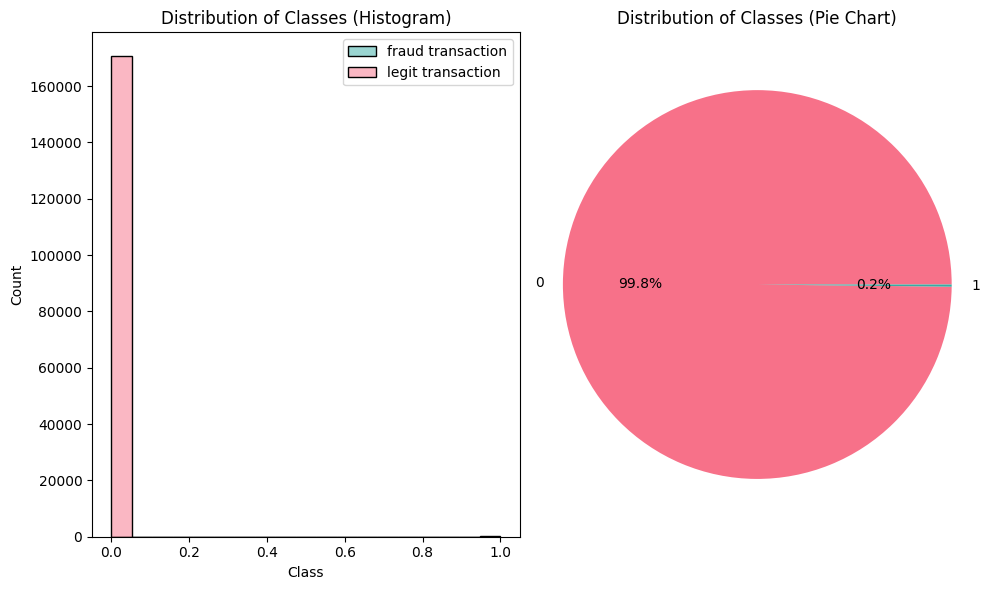

,Type of transaction,count,ratio
0,legit,170579,0.998215
1,fraud,305,0.001785


In [7]:
plt.figure(figsize=(10, 6))

num_classes = len(df['Class'].unique())
palette = sns.color_palette("husl", num_classes)

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Class', hue='Class', palette=palette)
plt.xlabel('Class')
plt.title('Distribution of Classes (Histogram)')
plt.legend(["fraud transaction", "legit transaction"])
plt.subplot(1, 2, 2)
class_counts = df['Class'].value_counts()
plt.pie(class_counts.values, labels=class_counts.index, colors=[palette[i] for i in range(num_classes)], autopct='%1.1f%%')
plt.title('Distribution of Classes (Pie Chart)')
plt.axis('equal') 
plt.tight_layout()
plt.show()
data = {'Type of transaction': ['legit', 'fraud'],
        'count':class_counts.tolist(),
        'ratio':[i/sum(class_counts.tolist()) for i in class_counts.to_list()]}
classes = pd.DataFrame(data)
classes.head()


### Clearly we encounter imbalanced data we will handle it later in data perpartion using different techniques
### but for now we will split the data based on legitmate class and analyze it. 

In [8]:
legit_trans = df['Class'] == 0
fraud_trans = df['Class'] == 1


In [11]:
features = df.columns
len(features)

31

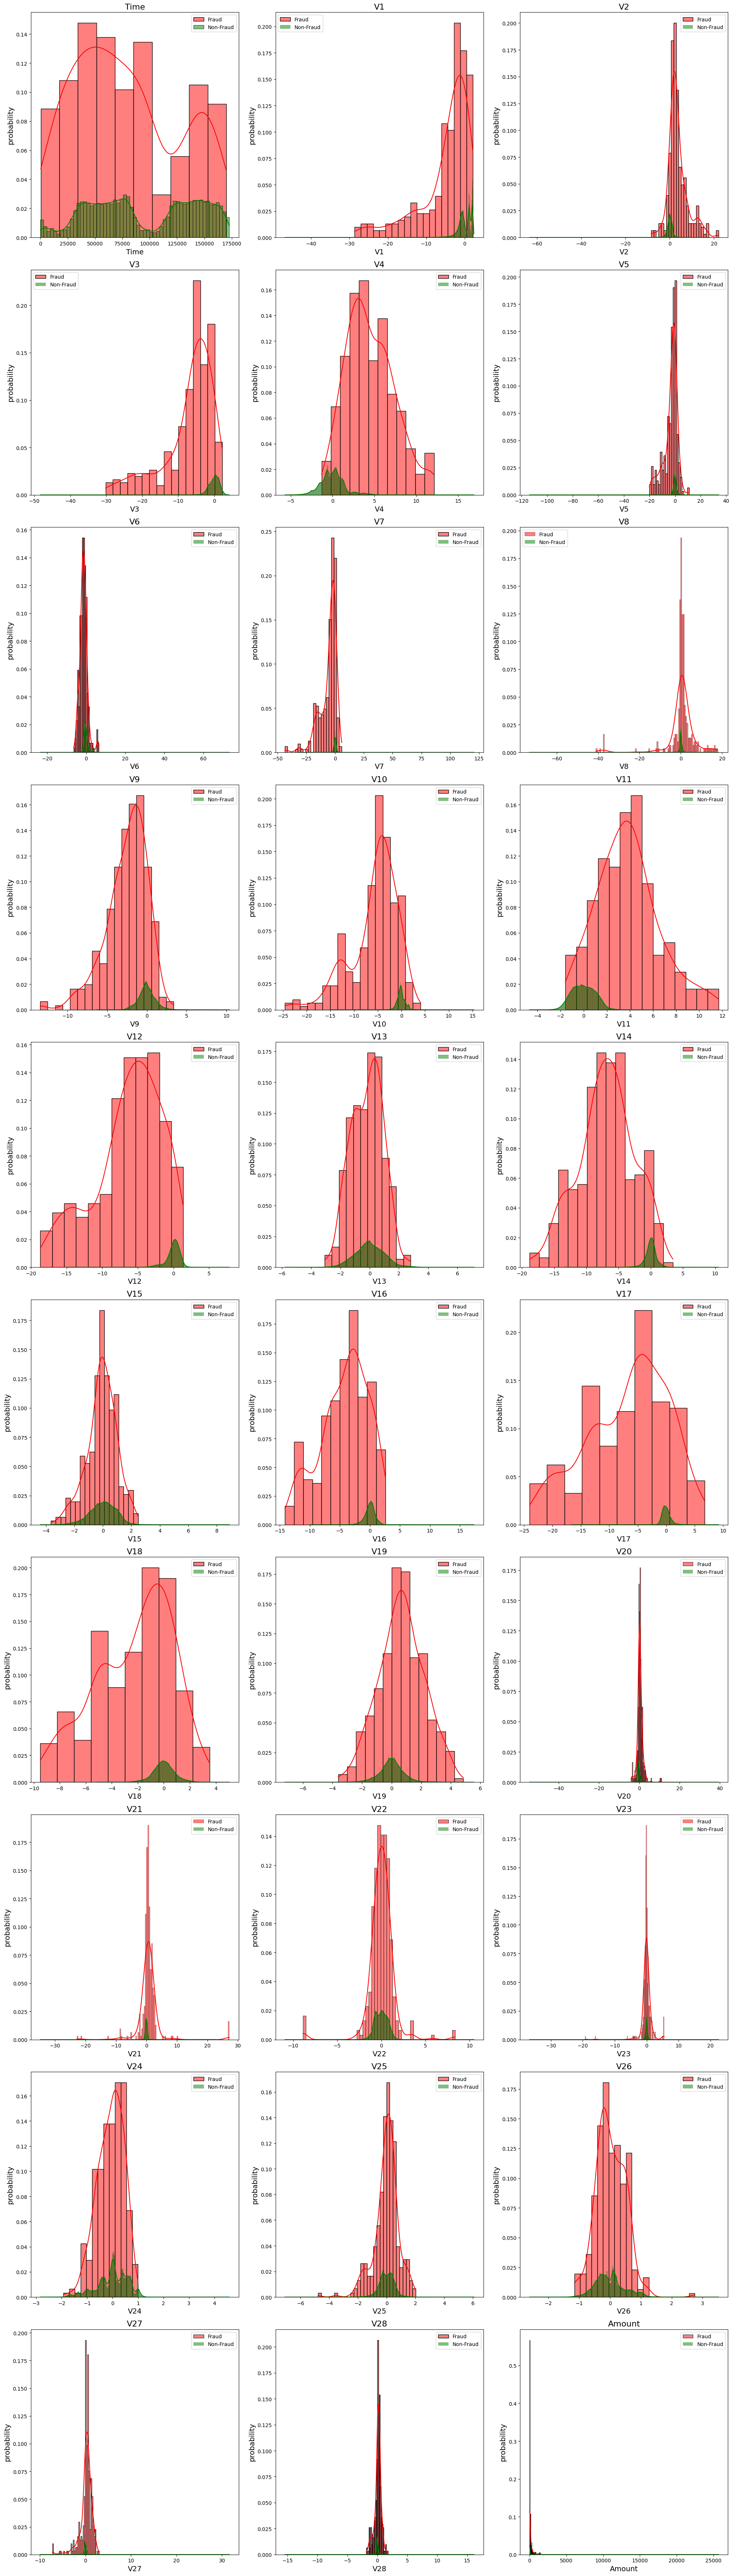

In [18]:
figure = plt.figure(figsize=(20, 70))
for i, feature in enumerate(features):
    if feature == 'Class':
        continue
    else:
        plt.subplot(10,3,i+1)
        sns.histplot(df[feature][fraud_trans], color='red', label='Fraud',stat='probability', kde=True, fill=True, alpha=0.5) 
        sns.histplot(df[feature][legit_trans], color='green', label='Non-Fraud',stat='probability', kde=True, fill=True, alpha=0.5)
        plt.title(feature, fontsize=16)
        plt.xlabel(feature, fontsize=14)
        plt.ylabel('probability', fontsize=14)
        plt.legend()
plt.tight_layout()
plt.show()

## We see the time distribution are similar in both records legimate and fraud and a little bit different in the other unknown features 
## so we won't do make much analysis in these data

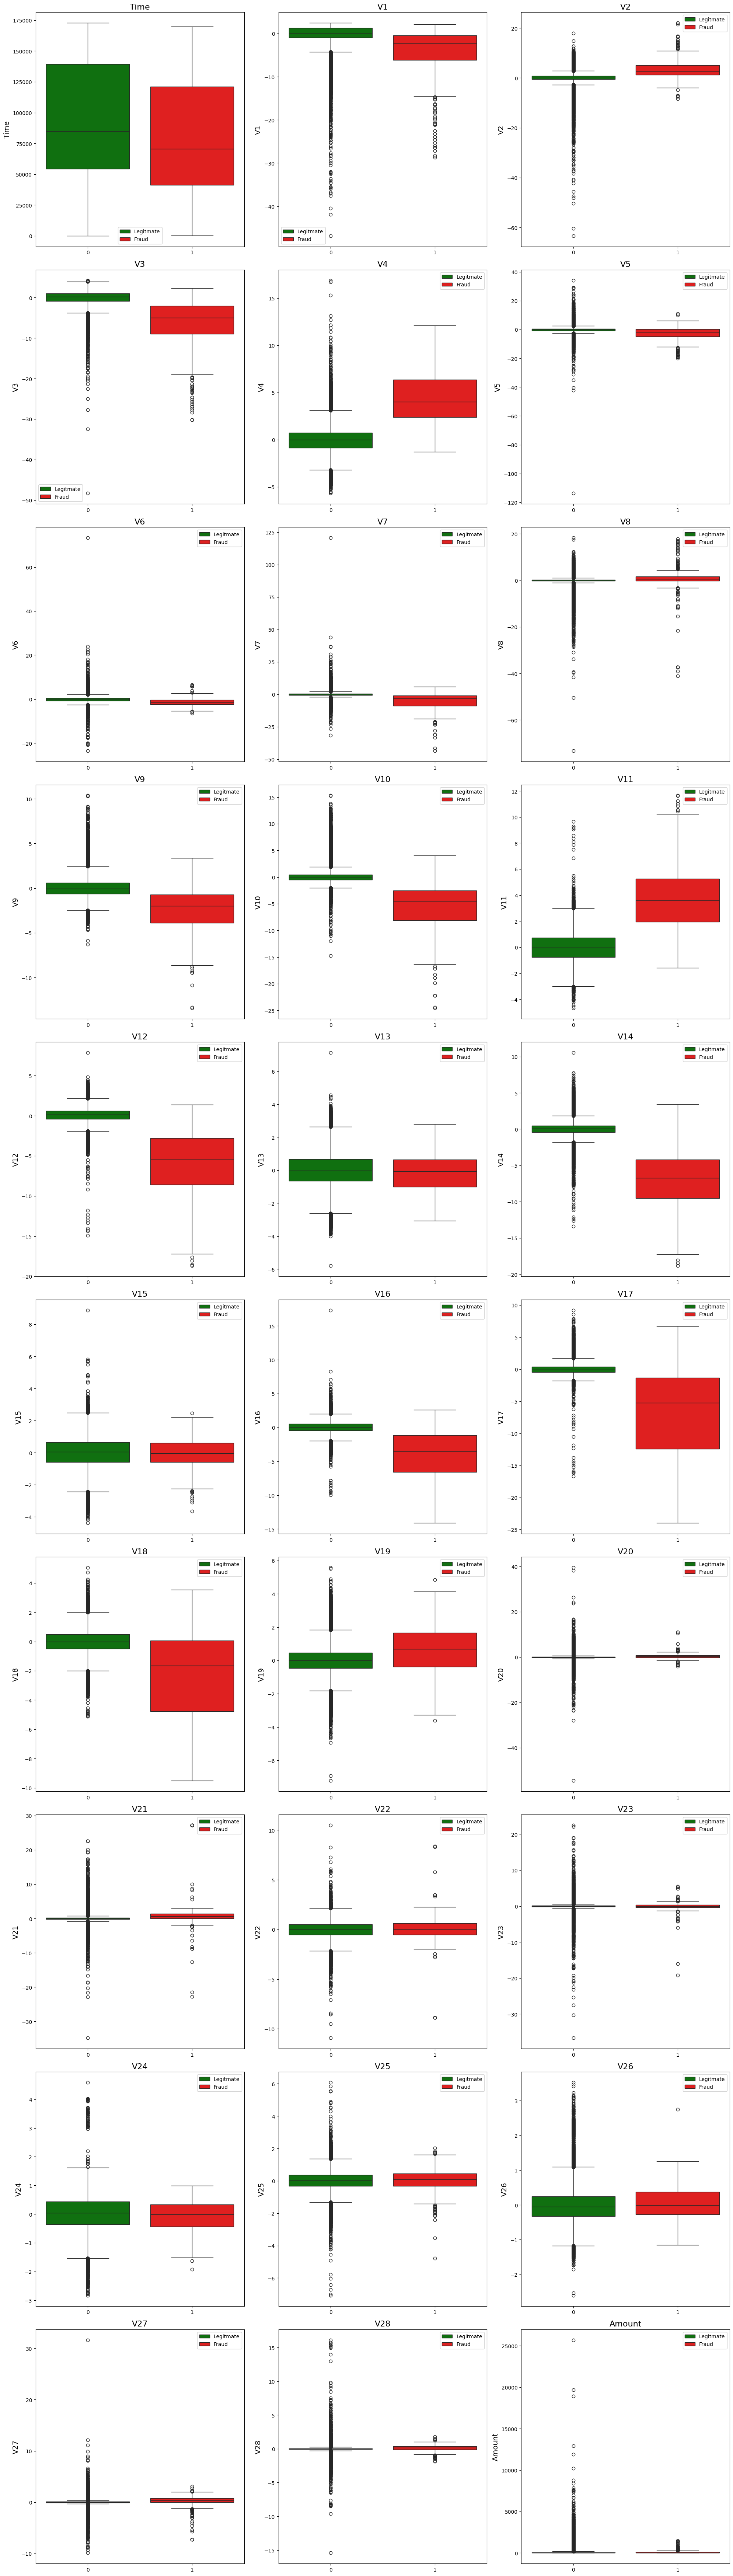

In [28]:
figure = plt.figure(figsize=(20, 70))

for i, feature in enumerate(features):
    if feature == 'Class':
        continue
    else:
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='Class', y=feature, data=df, hue='Class', palette=['green', 'red'], widths=0.8)
        plt.title(feature, fontsize=16)
        plt.xlabel('', fontsize=14)  # Remove x-axis label as it's not needed for boxplots
        plt.ylabel(feature, fontsize=14)
        plt.xticks()  
        plt.legend(['Legitmate', 'Fraud'])
plt.tight_layout()
plt.show()

## now we know that the other features affect the status of the transaction accoding to outliers and histogram

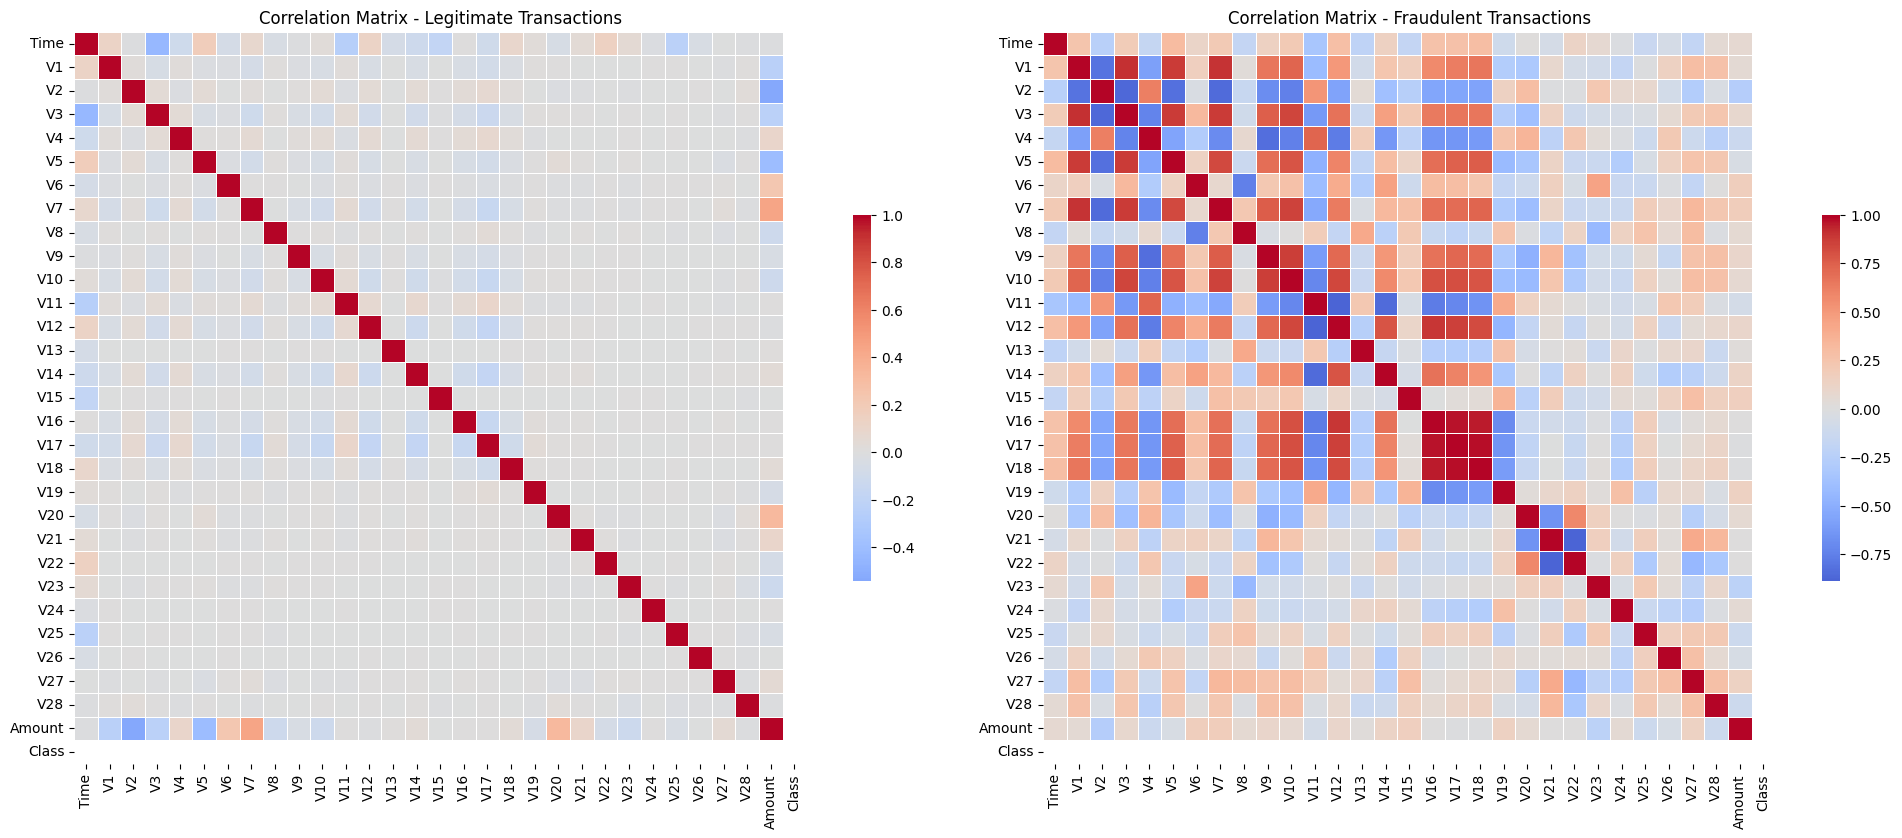

In [30]:
legit_df = df[legit_trans][features]
fraud_df = df[fraud_trans][features]


legit_corr = legit_df.corr()
fraud_corr = fraud_df.corr()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(legit_corr, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5}, ax=ax1)
ax1.set_title('Correlation Matrix - Legitimate Transactions')

sns.heatmap(fraud_corr, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5}, ax=ax2)
ax2.set_title('Correlation Matrix - Fraudulent Transactions')

plt.tight_layout()
plt.show()